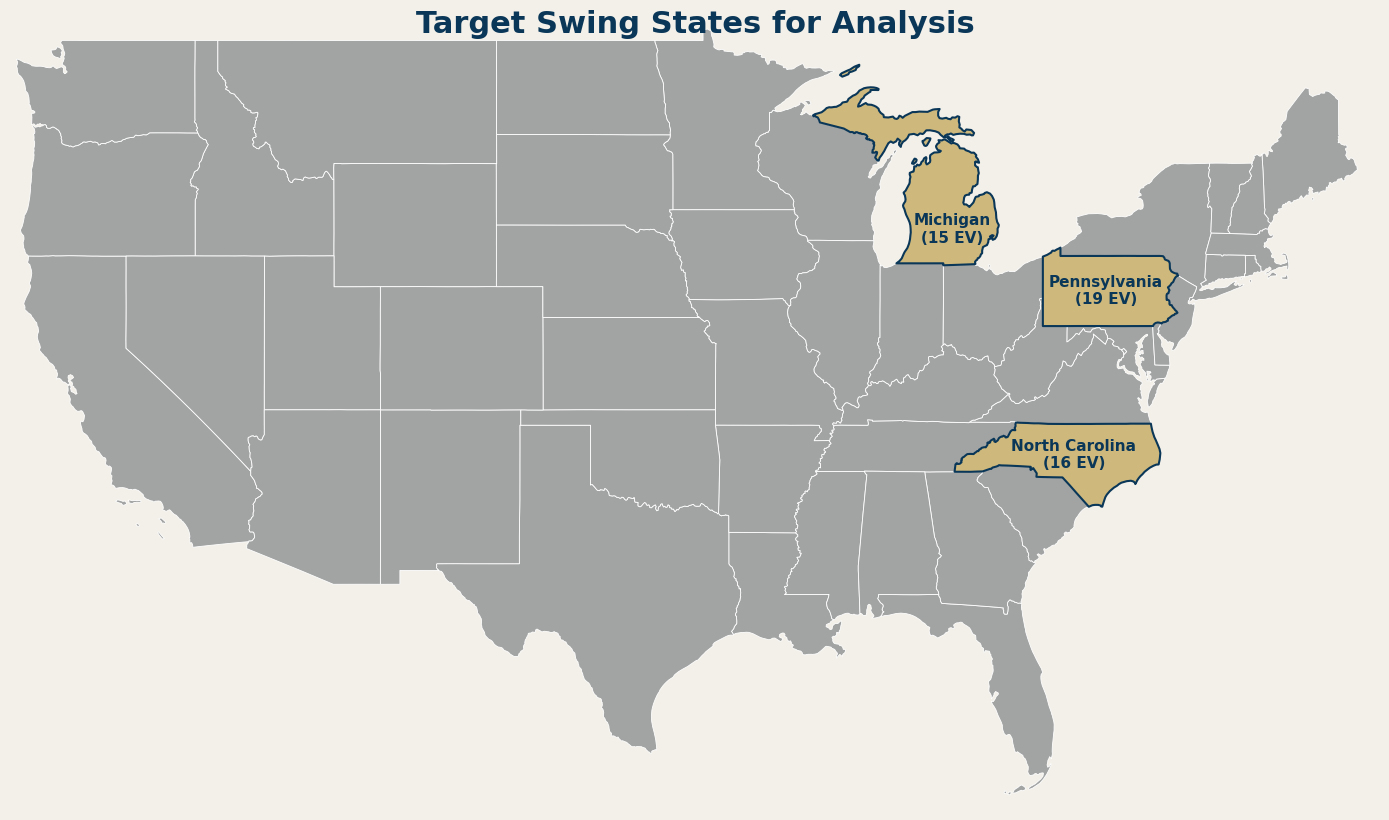

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load US states shapefile
usa = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip")

# filter out Alaska, Hawaii, and territories
continental = usa[~usa['STUSPS'].isin(['AK', 'HI', 'PR', 'VI', 'GU', 'AS', 'MP'])]

# target states with their electoral votes (keys must match STUSPS)
target_states = {
    'PA': {'name': 'Pennsylvania', 'ev': 19},
    'MI': {'name': 'Michigan', 'ev': 15},
    'NC': {'name': 'North Carolina', 'ev': 16}
}

# manual offsets for labels (x, y)
label_offsets = {
    'PA': (0, 0),
    'MI': (1.0, -1.5),
    'NC': (0, 0)
}

# CU Boulder colors
cu_gold = '#CFB87C'
cu_light_gray = '#A2A4A3'
cu_dark_gray = '#565A5C'
cu_dark_blue = '#0A3758'
cu_light_gold = '#F3F0E9'

# create figure with light gold background
fig, ax = plt.subplots(1, 1, figsize=(14, 9), facecolor=cu_light_gold)
ax.set_facecolor(cu_light_gold)

# plot all states
continental.plot(ax=ax, color=cu_light_gray, edgecolor='white', linewidth=0.6)

# plot target states with thicker border
target_gdf = continental[continental['STUSPS'].isin(target_states.keys())]
target_gdf.plot(ax=ax, color=cu_gold, edgecolor=cu_dark_blue, linewidth=1.5)

# add labels with full state name and electoral votes
for idx, row in target_gdf.iterrows():
    centroid = row.geometry.centroid
    state = row['STUSPS']
    offset = label_offsets[state]
    label = f"{target_states[state]['name']}\n({target_states[state]['ev']} EV)"
    ax.annotate(label, xy=(centroid.x + offset[0], centroid.y + offset[1]), 
                ha='center', va='center',
                fontsize=11, fontweight='bold', color=cu_dark_blue,
                linespacing=1.2)

# title only
fig.suptitle('Target Swing States for Analysis', fontsize=22, fontweight='bold', 
             color=cu_dark_blue, y=0.92)

ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)
ax.axis('off')

plt.tight_layout()
plt.show()